In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

## Heavy Tails ##

This short section shows an example of how expectations and SDs, though very useful in many situations, aren't quite adequate when distributions have long, fat tails. Here is one such distribution. You can see that the tail stretches out quite far.

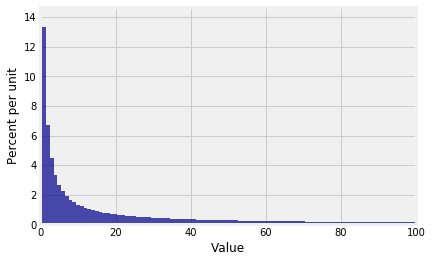

In [2]:
N = 1000
n = np.arange(1, N+1, 1)
probs = (1/n)*(1/np.sum(1/n))
dist = Table().values(n).probabilities(probs)
Plot(dist)
plt.xlim(0, N/10);

If we sample independently from this population, how does the sample average behave? Averages are affected by values out in the tails. 

Let's simulate the distribution of the average of a random sample of size 500 from this distribution. We'll do 10,000 repetitions to try to get the empirical distribution to settle down.

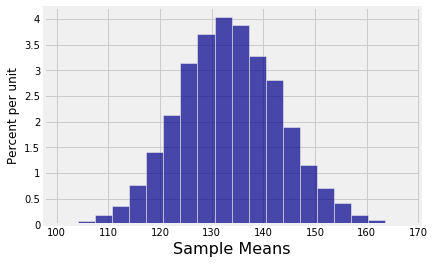

In [3]:
means = make_array()
for i in range(10000):
    means = np.append(means, np.mean(dist.sample_from_dist(500)))
Table().with_column('Sample Means', means).hist(bins=20)

That's a lovely distribution, but take a look at where it is centered. The center is just above 130, whereas the original distribution looked as though it was petering out at about 100:

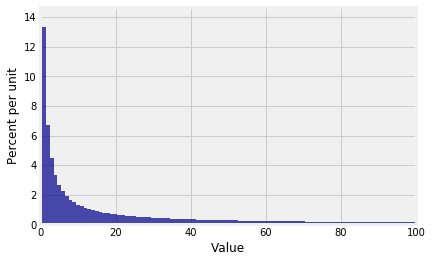

In [4]:
Plot(dist)
plt.xlim(0, N/10);

This is where we have to remember that the original disribution actually goes out to 1000. Even though the tail is hardly visible beyond 100 on the scale of our graph, it is there and it is affecting the expectation. The expected value is about 133.6, which explains the center of the empirical distribution of the sample average. 

In [5]:
dist.ev()

133.59213049244224

It is sobering to realize that the balance point of the above histogram isn't even visible on the graph. There is enough mass far out in the tails to pull the balance point away to the right.

How do we reconcile this with Chebyshev's Inequality telling us that the bulk of the probability is within a few SDs of the mean? The only way to find out is to calculate the SD of the distribution.

In [6]:
dist.sd()

221.39558257101038

And there we have it. The SD is huge, even bigger than the mean. The long tail makes the SD very large – so large that even the interval "expected value plus or minus one SD" is extremely wide and contains almost all the data.

To analyze heavy-tailed distributions like this, the expected value and SD aren't the best quantities to use. There is a large literature on what should be used instead. You might come across it in a more advanced course.

### Zipf's Law ###
You are almost certain to come across distributions like these if you study natural language processing, or linguistics, or economics, or even the populations of cities. The example used in this section is one of the *Zipf* distributions that occurs in those fields.

[Zipf's Law](https://en.wikipedia.org/wiki/Zipf's_law) is an empirically observed law that says that in large bodies of words, the frequency of a word is inversely proportional to its rank in a frequency table. That is, the frequency of the second most commonly occurring word is half the frequency of the most frequent. The frequency of the third most commonly occurring word is one-third of the frequency of the most frequent. And so on.

According to Wikipedia, "... in the Brown Corpus of American English text, the word "the" is the most frequently occurring word, and by itself accounts for nearly 7% of all word occurrences (69,971 out of slightly over 1 million). True to Zipf's Law, the second-place word "of" accounts for slightly over 3.5% of words (36,411 occurrences), followed by "and" (28,852). Only 135 vocabulary items are needed to account for half the Brown Corpus."

Now take another look at how the underlying distribution in our example was defined:

In [7]:
N = 1000
n = np.arange(1, N+1, 1)
probs = (1/n)*(1/np.sum(1/n))

We are pretending that we have a corpus of $N=1000$ words arranged in rank order, with Rank 1 being awarded to the most commonly occurring word. The probabilities are inversely proportional to rank. Notice that `1/np.sum(1/n)` is just the constant of proportionality that makes the probabilities add up to 1. If you call that constant $c$, then the probabilities are:

$$ 
P(X = n) = c \cdot \frac{1}{n}, ~~~ 1 \le n \le N
$$

Notice that $E(X) = cN$ and $E(X^2) = c \cdot \frac{N(N+1)}{2}$, so $Var(X) = (\frac{c}{2} - c^2)N^2 + (\frac{c}{2})N$. 

As $N$ gets large, $E(X)$ and $SD(X)$ both head off to infinity at rates that make elementary calculations inadequate for getting useful results. 